<a href="https://colab.research.google.com/github/Charles20239/Credit_Card_Default_Prediction/blob/main/DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('default_of_credit_card_clients.csv', header=1)

In [3]:
# show data
data.head(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# adjust "EDUCATION" column
data["EDUCATION"] = data["EDUCATION"].replace({0:4, 5:4 ,6:4})
# adjust "MARRIAGE" column
data["MARRIAGE"] = data["MARRIAGE"].replace({0:3})

In [5]:
# show data information
data.shape

(30000, 25)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# split data into features (X) and target (Y)
X = data.drop(["ID","default payment next month"],axis = 1)  # exclude the last column (the target) and the first two rows (header)
Y = data["default payment next month"]  # last column is the target variable

# standardize characteristics
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((21000, 23), (9000, 23))

**Test neural net work**

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# define model
model = Sequential([
    Dense(64, input_dim=23, activation='relu'),  # Input layer and the first hidden layer
    Dense(32, activation='relu'),                # the second hidden layer
    Dense(16, activation='relu'),                # the third hidden layer
    Dense(1, activation='sigmoid')               # output layer
])

# compile model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# train model
history = model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=64)


Epoch 1/50
263/263 [==============================] - 1s 3ms/step - loss: 0.4775 - accuracy: 0.8058 - val_loss: 0.4654 - val_accuracy: 0.8095
Epoch 2/50
263/263 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8182 - val_loss: 0.4566 - val_accuracy: 0.8140
Epoch 3/50
263/263 [==============================] - 0s 2ms/step - loss: 0.4340 - accuracy: 0.8199 - val_loss: 0.4524 - val_accuracy: 0.8095
Epoch 4/50
263/263 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8218 - val_loss: 0.4536 - val_accuracy: 0.8119
Epoch 5/50
263/263 [==============================] - 0s 2ms/step - loss: 0.4266 - accuracy: 0.8227 - val_loss: 0.4513 - val_accuracy: 0.8124
Epoch 6/50
263/263 [==============================] - 1s 2ms/step - loss: 0.4234 - accuracy: 0.8229 - val_loss: 0.4471 - val_accuracy: 0.8124
Epoch 7/50
263/263 [==============================] - 0s 2ms/step - loss: 0.4216 - accuracy: 0.8239 - val_loss: 0.4484 - val_accuracy: 0.8124
Epoch 

In [10]:
# evaluated on the test set
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"loss on test set: {loss:.4f}")
print(f"accuracy on test set: {accuracy:.4f}")

282/282 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.8008
loss on test set: 0.4821
accuracy on test set: 0.8008


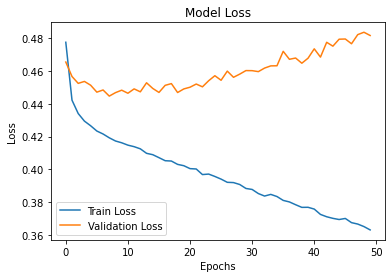

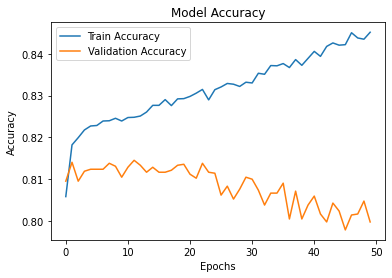

In [11]:
import matplotlib.pyplot as plt

# plot the training loss and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()


In [12]:
from sklearn.metrics import classification_report

# generating predictions (probabilities)
y_pred_prob = model.predict(X_test)

# convert probabilities to labels
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]


282/282 [==============================] - 0s 981us/step


In [13]:
print(classification_report(Y_test, Y_pred, target_names=['Not Default', 'Default']))


              precision    recall  f1-score   support

 Not Default       0.84      0.92      0.88      7040
     Default       0.56      0.38      0.45      1960

    accuracy                           0.80      9000
   macro avg       0.70      0.65      0.67      9000
weighted avg       0.78      0.80      0.79      9000



**Start cross validation(unbalanced data)**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

def build_model(n_layers, n_units, optimizer='adam', learning_rate=0.001):
    model = Sequential()
    model.add(Dense(n_units, input_dim=23, activation='relu'))

    for _ in range(n_layers - 1):
        model.add(Dense(n_units, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    if optimizer == 'adam':
        opt = Adam(learning_rate=learning_rate)
    elif optimizer == 'sgd':
        opt = SGD(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer")

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [15]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# define neural net model
def build_model(n_layers, n_units, optimizer, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(n_units, activation='relu', input_shape=(23,)))  # input layer
    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation='relu'))  # hidden layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # output layer

    # optimizer
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# parameters
optimizer_options = ['adam', 'sgd']
learning_rate_options = [0.001, 0.01, 0.1]
layer_options = [1, 2, 3, 4]
unit_options = [32, 64, 128, 256]
batch_size_options = [32, 64, 128]
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_score = 0
best_params = {}

# grid search
for optimizer in optimizer_options:
    for learning_rate in learning_rate_options:
        for n_layers in layer_options:
            for n_units in unit_options:
                for batch_size in batch_size_options:
                    cv_scores = []
                    for train, test in kfold.split(X_train, Y_train):
                        # change data set typr
                        X_train_fold = X_train[train]
                        Y_train_fold = Y_train.iloc[train].values
                        X_test_fold = X_train[test]
                        Y_test_fold = Y_train.iloc[test].values

                        model = build_model(n_layers, n_units, optimizer, learning_rate)
                        model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=batch_size, verbose=0)
                        scores = model.evaluate(X_test_fold, Y_test_fold, verbose=0)
                        cv_scores.append(scores[1])  # suppose scores[1] is accuracy
                    score = np.mean(cv_scores)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            'optimizer': optimizer,
                            'learning_rate': learning_rate,
                            'n_layers': n_layers,
                            'n_units': n_units,
                            'batch_size': batch_size
                        }
                    print(f"Opt: {optimizer}, LR: {learning_rate}, Layers: {n_layers}, Units: {n_units}, Batch Size: {batch_size}, Mean CV Accuracy: {score:.2f}")

print(f"Best Score: {best_score:.2f}")
print("Best Parameters:", best_params)


Opt: adam, LR: 0.001, Layers: 1, Units: 32, Batch Size: 32, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 32, Batch Size: 64, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 32, Batch Size: 128, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 64, Batch Size: 32, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 64, Batch Size: 64, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 64, Batch Size: 128, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 128, Batch Size: 32, Mean CV Accuracy: 0.81
Opt: adam, LR: 0.001, Layers: 1, Units: 128, Batch Size: 64, Mean CV Accuracy: 0.81
Opt: adam, LR: 0.001, Layers: 1, Units: 128, Batch Size: 128, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 256, Batch Size: 32, Mean CV Accuracy: 0.81
Opt: adam, LR: 0.001, Layers: 1, Units: 256, Batch Size: 64, Mean CV Accuracy: 0.82
Opt: adam, LR: 0.001, Layers: 1, Units: 256, Batch Size: 128, Mean CV Accuracy:

In [29]:
#best_params1 =  {'optimizer': 'sgd', 'learning_rate': 0.01, 'n_layers': 4, 'n_units': 32, 'batch_size': 64}
#print(best_params1)

{'optimizer': 'sgd', 'learning_rate': 0.01, 'n_layers': 4, 'n_units': 32, 'batch_size': 64}


In [17]:
# model with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_units'], best_params['optimizer'], best_params['learning_rate'])

# re-train model
history = best_model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=best_params['batch_size'])


Epoch 1/50
525/525 [==============================] - 1s 2ms/step - loss: 0.5224 - accuracy: 0.7764 - val_loss: 0.4917 - val_accuracy: 0.7838
Epoch 2/50
525/525 [==============================] - 1s 2ms/step - loss: 0.4728 - accuracy: 0.8032 - val_loss: 0.4698 - val_accuracy: 0.8040
Epoch 3/50
525/525 [==============================] - 1s 2ms/step - loss: 0.4562 - accuracy: 0.8130 - val_loss: 0.4619 - val_accuracy: 0.8050
Epoch 4/50
525/525 [==============================] - 1s 1ms/step - loss: 0.4494 - accuracy: 0.8165 - val_loss: 0.4591 - val_accuracy: 0.8093
Epoch 5/50
525/525 [==============================] - 1s 2ms/step - loss: 0.4454 - accuracy: 0.8177 - val_loss: 0.4566 - val_accuracy: 0.8119
Epoch 6/50
525/525 [==============================] - 1s 2ms/step - loss: 0.4426 - accuracy: 0.8200 - val_loss: 0.4545 - val_accuracy: 0.8121
Epoch 7/50
525/525 [==============================] - 1s 2ms/step - loss: 0.4402 - accuracy: 0.8199 - val_loss: 0.4537 - val_accuracy: 0.8121
Epoch 

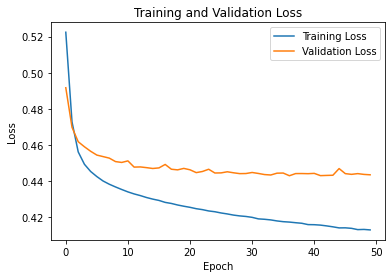

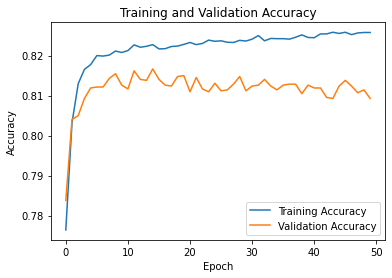

In [18]:
# plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [19]:
from sklearn.metrics import classification_report

# generating predictions (probabilities)
y_pred_prob = model.predict(X_test)

# convert probabilities to labels
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

282/282 [==============================] - 1s 2ms/step


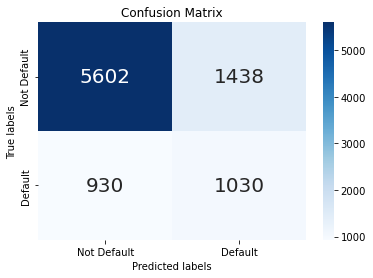

In [20]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(classification_report(Y_test, Y_pred, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.86      0.80      0.83      7040
     Default       0.42      0.53      0.47      1960

    accuracy                           0.74      9000
   macro avg       0.64      0.66      0.65      9000
weighted avg       0.76      0.74      0.75      9000



**Start cross validation(balanced data)**

In [19]:
pip install imblearn

     ------------------------------------- 235.6/235.6 kB 29.1 kB/s eta 0:00:00
     ------------------------------------- 302.2/302.2 kB 34.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# balance the data, create two data type
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_resampled, Y_resampled = smote.fit_resample(X_train, Y_train)

In [21]:
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import numpy as np

# define neural net model
def build_model(n_layers, n_units, optimizer, learning_rate):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(n_units, activation='relu', input_shape=(23,)))  # input layer
    for _ in range(1, n_layers):
        model.add(tf.keras.layers.Dense(n_units, activation='relu'))  # hidden layer
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # output layer

    # optimizer
    if optimizer == 'adam':
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    else:
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)

    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# parameters
optimizer_options = ['adam', 'sgd']
learning_rate_options = [0.001, 0.01, 0.1]
layer_options = [1, 2, 3, 4]
unit_options = [32, 64, 128, 256]
batch_size_options = [32, 64, 128]
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

best_score = 0
best_params = {}

# grid search
for optimizer in optimizer_options:
    for learning_rate in learning_rate_options:
        for n_layers in layer_options:
            for n_units in unit_options:
                for batch_size in batch_size_options:
                    cv_scores = []
                    for train, test in kfold.split(X_resampled, Y_resampled):
                        # change data set typr
                        X_train_fold = X_resampled[train]
                        Y_train_fold = Y_resampled.iloc[train].values
                        X_test_fold = X_resampled[test]
                        Y_test_fold = Y_resampled.iloc[test].values

                        model = build_model(n_layers, n_units, optimizer, learning_rate)
                        model.fit(X_train_fold, Y_train_fold, epochs=50, batch_size=batch_size, verbose=0)
                        scores = model.evaluate(X_test_fold, Y_test_fold, verbose=0)
                        cv_scores.append(scores[1])  # suppose scores[1] is accuracy
                    score = np.mean(cv_scores)
                    if score > best_score:
                        best_score = score
                        best_params = {
                            'optimizer': optimizer,
                            'learning_rate': learning_rate,
                            'n_layers': n_layers,
                            'n_units': n_units,
                            'batch_size': batch_size
                        }
                    print(f"Opt: {optimizer}, LR: {learning_rate}, Layers: {n_layers}, Units: {n_units}, Batch Size: {batch_size}, Mean CV Accuracy: {score:.2f}")

print(f"Best Score: {best_score:.2f}")
print("Best Parameters:", best_params)


Opt: adam, LR: 0.001, Layers: 1, Units: 32, Batch Size: 32, Mean CV Accuracy: 0.72
Opt: adam, LR: 0.001, Layers: 1, Units: 32, Batch Size: 64, Mean CV Accuracy: 0.72
Opt: adam, LR: 0.001, Layers: 1, Units: 32, Batch Size: 128, Mean CV Accuracy: 0.72
Opt: adam, LR: 0.001, Layers: 1, Units: 64, Batch Size: 32, Mean CV Accuracy: 0.72
Opt: adam, LR: 0.001, Layers: 1, Units: 64, Batch Size: 64, Mean CV Accuracy: 0.72
Opt: adam, LR: 0.001, Layers: 1, Units: 64, Batch Size: 128, Mean CV Accuracy: 0.72
Opt: adam, LR: 0.001, Layers: 1, Units: 128, Batch Size: 32, Mean CV Accuracy: 0.73
Opt: adam, LR: 0.001, Layers: 1, Units: 128, Batch Size: 64, Mean CV Accuracy: 0.73
Opt: adam, LR: 0.001, Layers: 1, Units: 128, Batch Size: 128, Mean CV Accuracy: 0.73
Opt: adam, LR: 0.001, Layers: 1, Units: 256, Batch Size: 32, Mean CV Accuracy: 0.74
Opt: adam, LR: 0.001, Layers: 1, Units: 256, Batch Size: 64, Mean CV Accuracy: 0.73
Opt: adam, LR: 0.001, Layers: 1, Units: 256, Batch Size: 128, Mean CV Accuracy:

In [22]:
# model with the best parameters
best_model = build_model(best_params['n_layers'], best_params['n_units'], best_params['optimizer'], best_params['learning_rate'])

# re-train model
history = best_model.fit(X_train, Y_train, validation_split=0.2, epochs=50, batch_size=best_params['batch_size'])


Epoch 1/50
132/132 [==============================] - 7s 52ms/step - loss: 0.4720 - accuracy: 0.8081 - val_loss: 0.4591 - val_accuracy: 0.8098
Epoch 2/50
132/132 [==============================] - 7s 51ms/step - loss: 0.4350 - accuracy: 0.8193 - val_loss: 0.4452 - val_accuracy: 0.8148
Epoch 3/50
132/132 [==============================] - 7s 51ms/step - loss: 0.4275 - accuracy: 0.8226 - val_loss: 0.4485 - val_accuracy: 0.8140
Epoch 4/50
132/132 [==============================] - 7s 53ms/step - loss: 0.4223 - accuracy: 0.8241 - val_loss: 0.4504 - val_accuracy: 0.8114
Epoch 5/50
132/132 [==============================] - 7s 51ms/step - loss: 0.4192 - accuracy: 0.8239 - val_loss: 0.4445 - val_accuracy: 0.8105
Epoch 6/50
132/132 [==============================] - 7s 52ms/step - loss: 0.4146 - accuracy: 0.8257 - val_loss: 0.4538 - val_accuracy: 0.8102
Epoch 7/50
132/132 [==============================] - 7s 51ms/step - loss: 0.4117 - accuracy: 0.8268 - val_loss: 0.4512 - val_accuracy: 0.8155

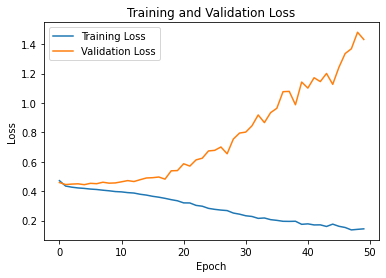

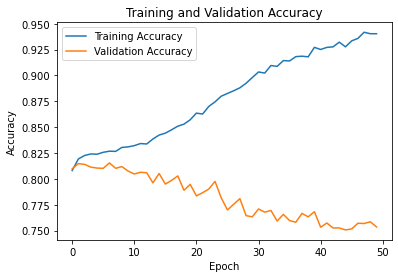

In [23]:
# plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# plot the training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import classification_report

# generating predictions (probabilities)
y_pred_prob = model.predict(X_test)

# convert probabilities to labels
Y_pred = [1 if prob > 0.5 else 0 for prob in y_pred_prob]

282/282 [==============================] - 2s 5ms/step


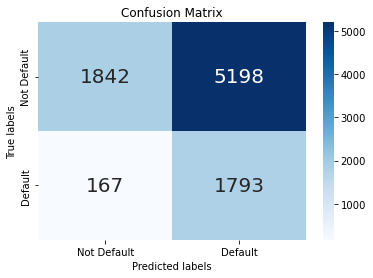

In [26]:
# confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True,annot_kws={"size": 20}, fmt="d", cmap="Blues", xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print(classification_report(Y_test, Y_pred, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.92      0.26      0.41      7040
     Default       0.26      0.91      0.40      1960

    accuracy                           0.40      9000
   macro avg       0.59      0.59      0.40      9000
weighted avg       0.77      0.40      0.41      9000



**Result with unbalanced data**

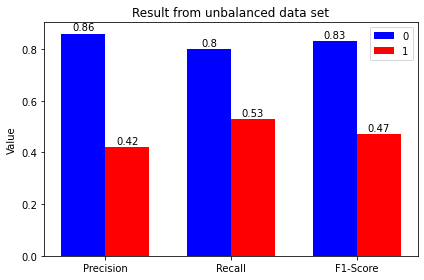

In [27]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.86, 0.80, 0.83]
group2_data = [0.42, 0.53, 0.47]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='0', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='1', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Result from unbalanced data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Result with balanced data**

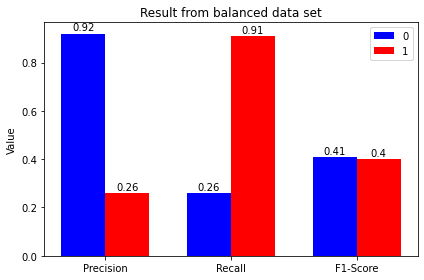

In [28]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.92, 0.26, 0.41]
group2_data = [0.26, 0.91, 0.40]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='0', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='1', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Result from balanced data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Other result include macro average and weighted average**

**Macro average**

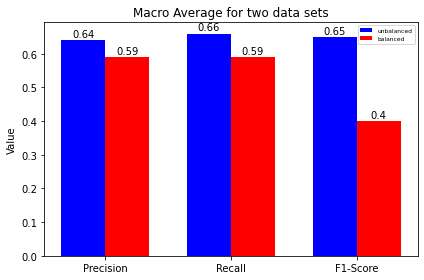

In [29]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.64, 0.66, 0.65]
group2_data = [0.59, 0.59, 0.40]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='unbalanced', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='balanced', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Macro Average for two data sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 6})

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


**Weighted Average**

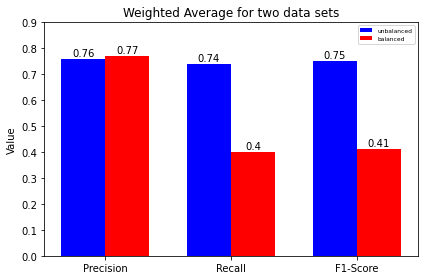

In [30]:
# load data
labels = ['Precision', 'Recall', 'F1-Score']
group1_data = [0.76, 0.74, 0.75]
group2_data = [0.77, 0.40, 0.41]

x = np.arange(len(labels))  # label position
width = 0.35  # width of column

fig, ax = plt.subplots()

rects1 = ax.bar(x - width/2, group1_data, width, label='unbalanced', color='b')
rects2 = ax.bar(x + width/2, group2_data, width, label='balanced', color='r')

# add text, title
ax.set_ylabel('Value')
ax.set_title('Weighted Average for two data sets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(prop={'size': 6})

# add label to each column
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # vertical shift
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.ylim((0.0,0.9))
plt.show()
